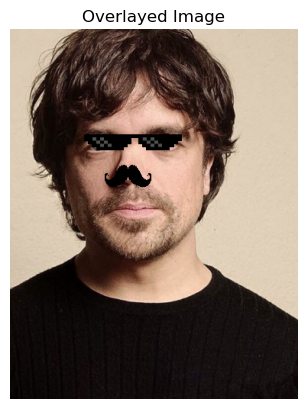

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load input image
img = cv2.imread('Test/Before.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar cascades
eye_cascade = cv2.CascadeClassifier('Train/third-party/frontalEyes35x16.xml')
nose_cascade = cv2.CascadeClassifier('Train/third-party/Nose18x15.xml')

# Load overlay images with alpha channel
glasses = cv2.imread('Train/glasses.png', cv2.IMREAD_UNCHANGED)
mustache = cv2.imread('Train/mustache.png', cv2.IMREAD_UNCHANGED)

# Detect eyes
eyes = eye_cascade.detectMultiScale(img_gray, 1.3, 5)
for (ex, ey, ew, eh) in eyes[:1]:  # Use first detected eye region
    glasses_resized = cv2.resize(glasses, (ew, eh))
    for i in range(glasses_resized.shape[0]):
        for j in range(glasses_resized.shape[1]):
            if glasses_resized[i, j, 3] > 0:  # Alpha channel check
                img[ey + i, ex + j] = glasses_resized[i, j, :3]

# Detect nose
nose = nose_cascade.detectMultiScale(img_gray, 1.3, 5)
for (nx, ny, nw, nh) in nose[:1]:  # Use first detected nose region
    mustache_resized = cv2.resize(mustache, (nw, nh))
    for i in range(mustache_resized.shape[0]):
        for j in range(mustache_resized.shape[1]):
            if mustache_resized[i, j, 3] > 0:
                img[ny + i, nx + j] = mustache_resized[i, j, :3]

# Convert BGR to RGB for display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Overlayed Image')
plt.show()

# Flatten and save to CSV
flat_img = img.reshape(-1, 3)
df = pd.DataFrame(flat_img, columns=['channel1', 'channel2', 'channel3'])
df.to_csv('Test/sample_output.csv', index=False)